In [14]:
import icarogw
import healpy as hp
import numpy as np
from  astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 21) 
mpl.rc('ytick', labelsize = 21)

In [3]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [4]:
PATH_TO_DENSITY_MATRIX = '/Users/ulyanadupletsa/Documents/Radio-Sirens/maps_icaro_data/'

In [5]:
np.random.seed(42)

In [6]:
nside = 128
npix = hp.nside2npix(nside)
H0_value = 67.7

# Note the log-uniform grid
lmax = 192

# redhsift range for reference
zmin = 0.005
zmax = 3.025

redshift_grid = np.array([0.005, 0.015, 0.035, 0.06 , 0.085, 0.11 , 0.135, 0.17 , 0.205,
        0.24 , 0.28 , 0.32 , 0.36 , 0.405, 0.455, 0.505, 0.56 , 0.62 ,
        0.68 , 0.745, 0.82 , 0.895, 0.975, 1.06 , 1.155, 1.26 , 1.365,
        1.485, 1.615, 1.755, 1.905, 2.05 , 2.205, 2.39 , 2.585, 2.795,
        3.025])

pixel_grid = np.arange(0, npix, 1).astype(int) # generates an array of (integer) numbers from 0 to npix-1


# Some gaussian fluctation for the density
# density matrix constructed from CLASS output: each row is a different redshift, each column correspond to the density of hydrogen in a pixel
# the number of columns correspond to npix
density_matrix = pd.read_hdf(PATH_TO_DENSITY_MATRIX + 'map4icaro_lmax' + str(lmax) + '_zmin' + str(zmin) + '_zmax' + str(zmax) + '_nside' + str(nside) + '.hdf5').to_numpy()
# Reference cosmology
cosmo_ref = icarogw.cosmology.astropycosmology(zmax=20.)
cosmo_ref.build_cosmology(FlatLambdaCDM(H0=H0_value,Om0=0.308)) # the same used in GADGET!

# Columns are pixel, rows are redshift. The things below are the pixel and redshift
# of each entry of the matrix
# Create a density-matrix-like matrix with the label of pixels in each row
# [[0, 1, 2, ..., npix-1]
# [ ... ]
# [0, 1, 2, ..., npix-1]]
# the number of rows corresponds to the number of redshift bins
pix_mat =  np.tile(np.arange(0,npix,1).astype(int),len(redshift_grid)).reshape(density_matrix.shape)

# Create similar matrix where each row is the same (repeated) redshift value
# [[zbin1, zbin1, ..., zbin1]
# [ ... ]
# [zbinN, zbinN, ..., zbinN]]]
# the number of rows corresponds to the number of redshift bins
# the number of columns equals the number of npix
red_mat =  np.column_stack([redshift_grid for i in range(npix)])

In [7]:
# Initialize the density map
HI = icarogw.HI.HI_map(redshift_grid,pixel_grid,density_matrix)

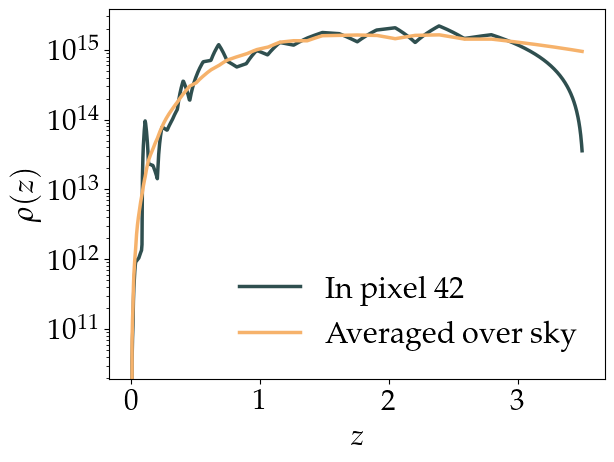

In [13]:
# We plot below the density as function of redshift

pixx = 42 # pick a pixel number (in 0 to npix-1) to plot the density of hydrogen as function of redshift
z_plot = np.linspace(1e-3,3.5,1000)
pixels_array = pixx*np.ones_like(z_plot)
gc = HI.drho_dzdomega(z_plot,pixels_array,cosmo_ref)
plt.plot(z_plot,gc,label='In pixel {:d}'.format(pixx), color=my_color_darker, linewidth=2.5)
gc = HI.drho_dzdomega(z_plot,pixels_array,cosmo_ref,average=True)
plt.plot(z_plot,gc,label = 'Averaged over sky', color=my_color2_darker, linewidth=2.5)
plt.yscale('log')
plt.xlabel('$z$', fontsize=21)
plt.ylabel('$\\rho(z)$', fontsize=22)
plt.legend(frameon=False, fontsize=22)

plt.savefig('plots/line_of_sight_distr.pdf', bbox_inches='tight')
plt.show()